# Session 26/6/2017 - machine learning

Découverte des trois problèmes de machine learning exposé dans l'article [Machine Learning - session 6](http://www.xavierdupre.fr/app/actuariat_python/helpsphinx/blog/2017/2017-06-25_plan_session6.html).

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## Problème 1 : comparaison random forest, linéaire

C'est un problème de régression. On cherche à comparer une random forest avec un modèle linéaire.

* Comparaison des tests de coefficients pour un modèle linéaire
  [OLS](http://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html>)
  et des [features importance](http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html)
* Résultat au niveau d'une observation [treeinterpreter](https://github.com/andosa/treeinterpreter>)
* Données : [Housing](https://archive.ics.uci.edu/ml/datasets/housing>), [Forest Fire](https://archive.ics.uci.edu/ml/datasets/Forest+Fires)

### Données

In [2]:
import pandas
df = pandas.read_csv("data/housing.data", delim_whitespace=True, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
cols = "CRIM ZN INDUS CHAS NOX RM AGE DIS RAD TAX PTRATIO B LSTAT MEDV".split()
df.columns = cols
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
X = df.drop("MEDV", axis=1)
y = df["MEDV"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

### Random Forest

In [5]:
from sklearn.ensemble import RandomForestRegressor
clr = RandomForestRegressor()
clr.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [6]:
importances = clr.feature_importances_
importances

array([0.04377988, 0.00098713, 0.00669368, 0.00092023, 0.02074126,
       0.4076033 , 0.01283279, 0.06458251, 0.0036521 , 0.01366027,
       0.01576497, 0.01209152, 0.39669034])

On s'inspire de l'exemple [Feature importances with forests of trees](http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html).

In [7]:
%matplotlib inline

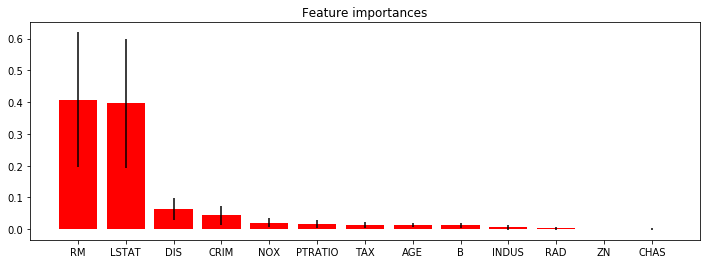

In [8]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12,4))
indices = np.argsort(importances)[::-1]
std = np.std([tree.feature_importances_ for tree in clr.estimators_],
             axis=0)
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
xlabels = list(df.columns[:-1])
xlabels = [xlabels[i] for i in indices]
plt.xticks(range(X.shape[1]), xlabels)
plt.xlim([-1, X.shape[1]])
plt.show()

In [9]:
from sklearn.metrics import r2_score
r2_score(y_train, clr.predict(X_train))

0.979236135448983

In [10]:
r2_score(y_test, clr.predict(X_test))

0.9843720628811461

### Modèle linéaire

In [11]:
import statsmodels.api as sm

In [12]:
model = sm.OLS(y_train, X_train)

In [13]:
results = model.fit()

In [14]:
results.params

CRIM      -0.109867
ZN         0.045855
INDUS     -0.054801
CHAS       3.758792
NOX       -5.285538
RM         6.267853
AGE       -0.022554
DIS       -1.169496
RAD        0.221785
TAX       -0.010410
PTRATIO   -0.447963
B          0.016474
LSTAT     -0.259210
dtype: float64

In [15]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     575.3
Date:                Fri, 07 Jun 2019   Prob (F-statistic):          7.10e-216
Time:                        16:38:39   Log-Likelihood:                -1025.5
No. Observations:                 339   AIC:                             2077.
Df Residuals:                     326   BIC:                             2127.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1099      0.039     -2.845      0.005      -0.186      -0.034
ZN             0.0459      0.018      2.543      0.011       0.010       0.081
INDUS         -0.0548      0.079     -0.697      0.486      -0.209       0.100
CHAS           3.7588      1.116      3.370      0.001       1.564       5.953
NOX           -5.2855      4.398     -1.202      0.230     -13.938       3.367
RM             6.2679      0.405     15.461      0.000       5.470       7.065
AGE           -0.0226      0.017     -1.325      0.186      -0.056       0.011
DIS           -1.1695      0.249     -4.692      0.000      -1.660      -0.679
RAD            0.2218      0.083      2.672      0.008       0.058       0.385
TAX           -0.0104      0.005     -2.155      0.032      -0.020      -0.001
PTRATIO       -0.4480      0.137     -3.261      0.001      -0.718      -0.178
B              0.0165      0.003      4.767      0.000       0.010       0.023
LSTAT         -0.2592      0.065     -3.959      0.000      -0.388      -0.130
==============================================================================
Omnibus:                      170.276   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1726.398
Skew:                           1.839   Prob(JB):                         0.00
Kurtosis:                      13.426   Cond. No.                     8.91e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
model = sm.OLS(y,X.drop("LSTAT", axis=1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     846.6
Date:                Fri, 07 Jun 2019   Prob (F-statistic):          2.38e-320
Time:                        16:38:39   Log-Likelihood:                -1556.1
No. Observations:                 506   AIC:                             3136.
Df Residuals:                     494   BIC:                             3187.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1439      0.036     -3.990      0.000      -0.215      -0.073
ZN             0.0413      0.015      2.696      0.007       0.011       0.071
INDUS         -0.0370      0.068     -0.540      0.589      -0.172       0.098
CHAS           3.2525      0.961      3.384      0.001       1.364       5.141
NOX          -10.8653      3.422     -3.175      0.002     -17.590      -4.141
RM             7.1436      0.289     24.734      0.000       6.576       7.711
AGE           -0.0449      0.014     -3.235      0.001      -0.072      -0.018
DIS           -1.2292      0.206     -5.980      0.000      -1.633      -0.825
RAD            0.2008      0.071      2.829      0.005       0.061       0.340
TAX           -0.0100      0.004     -2.391      0.017      -0.018      -0.002
PTRATIO       -0.6575      0.112     -5.881      0.000      -0.877      -0.438
B              0.0165      0.003      5.779      0.000       0.011       0.022
==============================================================================
Omnibus:                      277.013   Durbin-Watson:                   0.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3084.310
Skew:                           2.148   Prob(JB):                         0.00
Kurtosis:                      14.307   Cond. No.                     8.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### TPOT

[TPOT](https://github.com/rhiever/tpot) est un module d'apprentissage automatique.

In [17]:
try:
    from tpot import TPOTRegressor
except ImportError:
    # for sklearn 0.22
    import sklearn.preprocessing    
    from sklearn.impute import SimpleImputer
    sklearn.preprocessing.Imputer = SimpleImputer
    from tpot import TPOTRegressor

tpot = TPOTRegressor(generations=2, population_size=50, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_boston_pipeline.py')

Generation 1 - Current best internal CV score: -10.19955600172555
Generation 2 - Current best internal CV score: -10.19955600172555

Best pipeline: XGBRegressor(StandardScaler(input_matrix), learning_rate=0.1, max_depth=9, min_child_weight=2, n_estimators=100, nthread=1, subsample=0.8)
-9.01100125963658


Le module optimise les hyperparamètres, parfois un peu trop à en juger la mauvaise performance obtenue sur la base de test.

In [18]:
r2_score(y_train, tpot.predict(X_train))

0.9994364901579464

In [19]:
r2_score(y_test, tpot.predict(X_test))

0.8978805496355459

### Feature importance pour une observations

On reprend la première random forest et on utilise le module [treeinterpreter](https://github.com/andosa/treeinterpreter).

In [20]:
clr = RandomForestRegressor()
clr.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [21]:
from treeinterpreter import treeinterpreter as ti
prediction, bias, contributions = ti.predict(clr, X_test)

In [22]:
for i in range(min(2, X_train.shape[0])):
    print("Instance", i)
    print("Bias (trainset mean)", bias[i])
    print("Feature contributions:")
    for c, feature in sorted(zip(contributions[i], df.columns), 
                             key=lambda x: -abs(x[0])):
        print(feature, round(c, 2))
    print( "-"*20)

Instance 0
Bias (trainset mean) 22.527195652173905
Feature contributions:
RM 7.53
LSTAT 1.58
TAX -0.64
PTRATIO 0.6
DIS -0.4
INDUS 0.19
RAD -0.18
AGE 0.13
ZN 0.12
CRIM 0.07
NOX 0.06
B -0.01
CHAS -0.01
--------------------
Instance 1
Bias (trainset mean) 22.527195652173905
Feature contributions:
LSTAT -5.04
RM -1.64
B -0.9
NOX -0.89
CRIM -0.81
DIS 0.64
AGE 0.17
PTRATIO -0.07
TAX -0.04
CHAS -0.02
INDUS -0.0
ZN 0.0
RAD 0.0
--------------------


## Problème 2 : série temporelle

On prend une série sur [Google Trends](https://trends.google.fr/trends/explore?q=tennis%20live), dans notre cas, c'est la requête *tennis live*. On compare une approche linéaire et une approche non linéaire.

### Approche linéaire

In [23]:
import pandas
df = pandas.read_csv("data/multiTimeline.csv", skiprows=1)

In [24]:
df.columns= ["Semaine", "compte"]

In [25]:
df["SemaineDt"] = pandas.to_datetime(df.Semaine)

In [26]:
df=df.set_index("SemaineDt")

In [27]:
df["compte"] = df["compte"].astype(float)

In [28]:
df.head()

,Semaine,compte
SemaineDt,,
2012-07-01,2012-07-01,70.0
2012-07-08,2012-07-08,49.0
2012-07-15,2012-07-15,18.0
2012-07-22,2012-07-22,22.0
2012-07-29,2012-07-29,88.0


In [29]:
%matplotlib inline

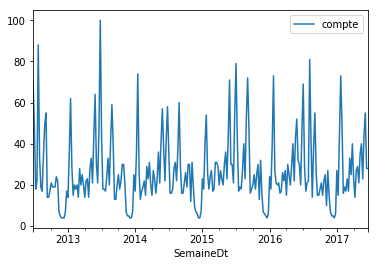

In [30]:
df.plot()

In [31]:
from statsmodels.tsa.arima_model import ARIMA
arma_mod = ARIMA(df["compte"].values, order=(6 ,1, 1))
res = arma_mod.fit()
res.params

array([ 0.00418581,  0.59035757, -0.32540695,  0.23286807, -0.03300838,
        0.06434307, -0.07204017, -0.99999983])

In [32]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  259
Model:                 ARIMA(6, 1, 1)   Log Likelihood               -1055.581
Method:                       css-mle   S.D. of innovations             14.116
Date:                Fri, 07 Jun 2019   AIC                           2129.161
Time:                        16:45:54   BIC                           2161.173
Sample:                             1   HQIC                          2142.032
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0042      0.021      0.196      0.845      -0.038       0.046
ar.L1.D.y      0.5904      0.063      9.431      0.000       0.468       0.713
ar.L2.D.y     -0.3254      0.072     -4.507      0.000      -0.467      -0.184
ar.L3.D.y      0.2329      0.075      3.097      0.002       0.085       0.380
ar.L4.D.y     -0.0330      0.076     -0.433      0.665      -0.182       0.116
ar.L5.D.y      0.0643      0.076      0.842      0.400      -0.085       0.214
ar.L6.D.y     -0.0720      0.066     -1.096      0.274      -0.201       0.057
ma.L1.D.y     -1.0000      0.010    -96.075      0.000      -1.020      -0.980
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2011           -1.2144j            1.7080           -0.3741
AR.2           -1.2011           +1.2144j            1.7080            0.3741
AR.3            0.1840           -1.4018j            1.4138           -0.2292
AR.4            0.1840           +1.4018j            1.4138            0.2292
AR.5            1.4636           -0.4882j            1.5429           -0.0512
AR.6            1.4636           +0.4882j            1.5429            0.0512
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

### Méthode non linéaire

On construire la matrice des séries décalées. Cette méthode permet de sortir du cadre linéaire et d'ajouter d'autres variables.

In [33]:
from statsmodels.tsa.tsatools import lagmat
lag = 8
X = lagmat(df["compte"], lag)
lagged = df.copy()
for c in range(1,lag+1):
    lagged["lag%d" % c] = X[:, c-1]
pandas.concat([lagged.head(), lagged.tail()])

,Semaine,compte,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8
SemaineDt,,,,,,,,,,
2012-07-01,2012-07-01,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-07-08,2012-07-08,49.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-07-15,2012-07-15,18.0,49.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-07-22,2012-07-22,22.0,18.0,49.0,70.0,0.0,0.0,0.0,0.0,0.0
2012-07-29,2012-07-29,88.0,22.0,18.0,49.0,70.0,0.0,0.0,0.0,0.0
2017-05-21,2017-05-21,23.0,40.0,35.0,21.0,29.0,27.0,14.0,23.0,40.0
2017-05-28,2017-05-28,44.0,23.0,40.0,35.0,21.0,29.0,27.0,14.0,23.0
2017-06-04,2017-06-04,55.0,44.0,23.0,40.0,35.0,21.0,29.0,27.0,14.0
2017-06-11,2017-06-11,28.0,55.0,44.0,23.0,40.0,35.0,21.0,29.0,27.0


In [34]:
xc = ["lag%d" % i for i in range(1,lag+1)]
split = 0.66
isplit = int(len(lagged) * split)
xt = lagged[10:][xc]
yt = lagged[10:]["compte"]
X_train, y_train, X_test, y_test = xt[:isplit], yt[:isplit], xt[isplit:], yt[isplit:]

In [35]:
from sklearn.ensemble import RandomForestRegressor
clr = RandomForestRegressor()
clr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [36]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test.values, clr.predict(X_test))
r2

0.4878325848907805

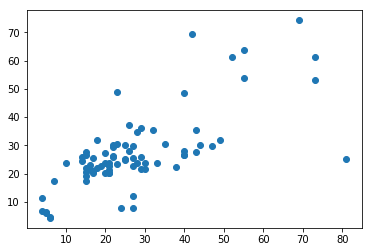

In [37]:
plt.scatter(y_test.values, clr.predict(X_test));

## Texte

On cherche à comparer une [LDA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html) avec [word2vec](https://radimrehurek.com/gensim/models/word2vec.html) et [kmeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) et les données qui sont sur [ensae_teaching_cs/src/ensae_teaching_cs/data/data_web/](https://github.com/sdpython/ensae_teaching_cs/tree/master/src/ensae_teaching_cs/data/data_web).

In [38]:
from ensae_teaching_cs.data import twitter_zip
df = twitter_zip(as_df=True)
df.head(n=2).T

,0,1
index,776066992054861825,776067660979245056
nb_user_mentions,0,0
nb_extended_entities,0,0
nb_hashtags,1,1
geo,NaN,NaN
text_hashtags,", SiJétaisPrésident",", SiJétaisPrésident"
annee,2016,2016
delimit_mention,NaN,NaN
lang,fr,fr
id_str,7.76067e+17,7.76068e+17


### Des mots aux coordonnées - tf-idf

In [39]:
keep = df.text.dropna().index

In [40]:
dfnonan = df.iloc[keep, :]
dfnonan.shape

(5087, 20)

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000)
tfidf = tfidf_vectorizer.fit_transform(dfnonan["text"])

In [42]:
tfidf[:2, :]

<2x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [43]:
tfidf[:2, :].todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

### LDA

In [44]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

In [45]:
lda.fit(tfidf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=5,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [46]:
tf_feature_names = tfidf_vectorizer.get_feature_names()
tf_feature_names[100:103]

['avoir', 'bac', 'bah']

In [47]:
lda.components_.shape

(10, 1000)

On obtient dix vecteurs qui représentent les dix vecteurs associés aux dix clusters. Chaque dimension relié au fait que le mot appartient ou non au cluster.

In [48]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [49]:
print_top_words(lda, tf_feature_names, 10)

Topic #0:
gratuit mcdo supprimerai école soir kebab macdo kfc domicile cc
Topic #1:
macron co https de la est le il et hollande
Topic #2:
sijetaispresident je les de la et le des en pour
Topic #3:
notaires eu organiserais mets carte nouveaux journées installation cache créer
Topic #4:
sijetaispresident interdirais les je ballerines la serait serais bah de
Topic #5:
ministre de sijetaispresident la je premier mort et nommerais président
Topic #6:
cours le supprimerais jour sijetaispresident lundi samedi semaine je vendredi
Topic #7:
port interdirait démissionnerais promesses heure rendrai ballerine mes changement christineboutin
Topic #8:
seraient sijetaispresident gratuits aux les nos putain éducation nationale bonne
Topic #9:
bordel seront légaliserai putes gratuites pizza mot virerais vitesse dutreil



### Clustering

In [50]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=10)
km.fit(tfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [51]:
km.cluster_centers_.shape

(10, 1000)

In [52]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.cluster_centers_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [53]:
print_top_words(km, tf_feature_names, 10)

Topic #0:
ferais je sijetaispresident les en sorte que de et un
Topic #1:
le sijetaispresident je monde et pour de tout des les
Topic #2:
de sijetaispresident la en et des une un plus aurait
Topic #3:
https co macron de la le les via et sijetaispresident
Topic #4:
les sijetaispresident je de et tous des seraient pour ballerines
Topic #5:
serait sijetaispresident la le merde de ça et on dans
Topic #6:
je sijetaispresident la des me et ferai pas en au
Topic #7:
macron est il de pas la hollande le gauche que
Topic #8:
ministre premier nommerais sijetaispresident de je la mickey serait nommerai
Topic #9:
serais je sijetaispresident un pas ne président que la de



Ah les stop words....